- Las ecuaciones diferenciales son importantes porque nos ayudar a describir fenómenos físicos y mediante su resolución podemos determinar las leyes físicas que resuelven problemas teóricos, prácticos y son fundamentales en el desarrollo de nuevos modelos.
- Las ecuaciones diferenciales ordianarias (EDO) son aquellas que incluyen únicamente derivadas respecto a una variable y existen varias técnicas para resolverlas de forma teórica. Desafortunadamente, la mayoría de las ecuaciones diferenciales en la naturaleza son parciales (EDP), es decir, incluyen derivadas respecto a dos o más variables. Un ejemplo notable es la ecuación de Navier-Stokes, que hasta la fecha no ha sido resuelta de forma analítica pero se ha logrado simplificarla y adaptarla a problemas particulares, y mediante los métodos numéricos se ha avanzado en la modelación de los fluidos.
- El caso de la hidrología no es distinto ya que se cuentan con algunas EDOs que nos permiten simular el escurrimiento en una cuenta y calcular el hidrograma. El principio es simple: las entradas menos sus salidas serán igual a un cambio en el almacenamiento dentro de la cuenca.
-
$$ I - O = \Delta\rm{Almacenamiento} $$ - Este cambio de almacenamiento podemos representarlo como una diferencia en el volumen en un tiempo determinado.
-
$$ I - O = \frac{\Delta V}{\Delta T} $$ - El problema se puede plantear como una ecuación diferencial.
-
$$ I - O = \frac{dV}{dT} $$ - Ecuación diferencial:
-
$$w-q=T_{*}\frac{dq}{dt} $$ - Solución analítica:
-
$$ q(t) = w+(q_0-w)e^{-\frac{t}{T*}}$$ - Condiciones iniciales:
-
$$ q=q_0 $$ $$ t=0$$ -
$$ \frac{dq}{dt} = \frac{1}{T_{*}}(w-q) $$ -
- # Ecuación de Dupuit
- La ecuación de Dupuit Forchheimer describe el flujo en un acuífero no confinado, donde el fluido se mueve de forma bidimensional. Con esta ecuación el problema se simplifica a una única dimension asumiendo que el flujo es horizontal y uniforme en la sección vertical, entonces el flujo por unidad de ancho a tráves de la sección vertical del acuífero está dada por citep{Misstear2017}:
-
$$ q=-KH\frac{dH}{dx} $$ - donde K es la conductividad hidráulica, H la elevación del nivel de agua (carga hidráulica) relativa al basamento del acuífero y $$\frac{dH}{dx}$$ es el gradiente hidráulico a lo largo del eje horizontal.
- Un caso de aplicación útil es la estimación de la recarga del acuífero, suponiendo que la tasa de infiltración $$w$$ es uniforme.
-
$$ q=wx $$ - Al combinar ambas ecuaciones se obtiene la siguiente ecuación diferencial:
-
$$KH\frac{dH}{dx}+wx=0$$ - La EDO puede resolverse de fácilmente mediante el método de variables separables:
-
$$ \frac{dH}{dx}=-\frac{wx}{KH}$$ - Para solucionar la ecuación de forma analítica definimos los límites de integración:
-
$$[H_0,H]$$ $$[0,x]$$ -
$$ \int_{H_0}^H H dH = -\frac{w}{K}\int_0^x x$$ -
$$ \left[H^2\right]_{H_0}^H = -\frac{w}{K}\left[x^2\right]_0^x$$ -
$$ H^2-H_0^2 = -\frac{w}{K}x^2$$ - La solución analítica es:
-
$$ H^2=H_0^2-\frac{w}{K}x^2 $$ - ## Problema de ejemplo
- Ejemplo tomado del libro escrito por cite{Misstear2017}.
- Calcular el nivel de agua en el río, considerando que la distancia desde el acuífero al río es de 2km. El nivel freático en el acuífero es de 7.5m y su conductividad hidráulica es $$25md^{-1}$$ . Considere una recarga de $$0.34mmd^{-1}$$
-
- ## Solución con redes neuronales profundas
- Importar las liberías necesarias.

In [165]:
	  import tensorflow as tf
	  import matplotlib.pyplot as plt
	  import numpy as np
	  from matplotlib.pyplot import figure
	  from tensorflow.random import normal

- Definir las condiciones iniciales, las constantes, la ecuación diferencial y la solución analítica.

In [166]:
	  # Condición inicial.
	  H0 = 7.5
	  # Constantes.
#w = 0.00034
w=0.0003355625
	  K = 25
c=w/K
	  # Ecuación diferencial.
	  #def f(x):
	  #    return -(w*x)/(K*g(x))
		# Ecuación diferencial.
def f(x,c):
	return -c*x/g(x)
	  # Solución analítica.
	  def solucion_analitica(x):
	     return np.sqrt(H0**2-(w/K)*x**2)

- Posteriormente se definen los parámetros que definirán la estructura de la red neuronal.

In [167]:
	  # Parámetros del entrenamiento.
	  aprendizaje = 0.0001
	  pasos = 1500
	  tamano = 1500
	  mostrar_avance = 100
	  # Número de neuronas para cada capa.
	  entrada = 1
	  oculta1 = 100
	  oculta2 = 100
	  neuronassalida = 1
	  # Límites para el cálculo manual de la derivada
	  x1=950
	  x2=1050
	  # separaciones=abs(x2-x1)/0.1
separaciones=10

In [168]:
separaciones

10

- A continuación se conecta la red neuronal profunda, definiendo las variables que almacenarán los pesos y los bias y su tamaño a partir del número de neuronas.

In [169]:
	  pesos = {
	      'w1': tf.Variable(normal([entrada, oculta1])),
	      'w2': tf.Variable(normal([oculta1, oculta2])),
	      's': tf.Variable(normal([oculta2, neuronassalida]))
	  }
	  bias = {
	      'b1': tf.Variable(normal([oculta1])),
	      'b2': tf.Variable(normal([oculta2])),
	      's': tf.Variable(normal([neuronassalida]))
	  }

- Se selecciona una función de optimización para el entrenamiento, que utilizará la tasa de aprendizaje.
-

In [170]:
	 optimizador = tf.optimizers.SGD(aprendizaje)

- El código siguiente crea la red neuronal profunda, a partir de los pesos, los bias y el número de neuronas que definen el tamaño de la red, en el ejemplo se utiliza la fución de activación sigmoid.
-

In [171]:
	  # Define la DNN
	  def dnn(x):
	      x = np.array([[[x]]],  dtype='float32')
	      # Primera capa oculta
	      capa1 = tf.add(tf.matmul(x, pesos['w1']), bias['b1'])
	      capa1 = tf.nn.sigmoid(capa1)
	      # Segunda capa oculta
	      capa2 = tf.add(tf.matmul(capa1, pesos['w2']), bias['b2'])
	      capa2 = tf.nn.sigmoid(capa2)
	      # Salida de la DNN
	      output = tf.matmul(capa2, pesos['s']) + bias['s']
	      return output


- Esta función objetivo ayudará a aproximar la solución de la EDO, ya que considera la condición inicial H0 y si derivamos la función g(x) obtendremos nuevamente la función dnn(x)
-

In [172]:
	  # Función objetivo
	  def g(x):
	      return x * dnn(x) + H0

- Definimos la ecuación de pérdida que aproximará la derivada en el proceso de aprendizaje y calculará el error cuadrático.
-

In [173]:
# Incremento para el cálculo de la derivada.
incremento = np.sqrt(np.finfo(np.float32).eps)
# Función de pérdida
def perdida():
    summation = []
    #Se calculan las derivadas de forma numérica.
    for x in np.linspace(x1,x2,separaciones):
    #for x in np.linspace(-200,0,1000):
        derivadaNN = (g(x+incremento)-g(x))/incremento
        # Suma de los errores al cuadrado.
        #summation.append((derivadaNN - f(x))**2)
        summation.append((derivadaNN - f(x,c))**2)
    # return tf.reduce_sum(tf.abs(summation))
    return tf.sqrt(tf.reduce_mean(tf.abs(summation)))

In [174]:
separaciones

10

In [175]:
np.linspace(-200,0,2000)

array([-2.00000000e+02, -1.99899950e+02, -1.99799900e+02, ...,
       -2.00100050e-01, -1.00050025e-01,  0.00000000e+00])

In [176]:
incremento

0.00034526698

In [177]:
#optimizador = tf.optimizers.Adam(learning_rate=aprendizaje)#.minimize(perdida)

- Se define la función que realizará el entrenamiento de la red, a partir de la función de pérdida, los pesos y bias.
-

In [178]:
	  def entrenamiento():
	      with tf.GradientTape() as tape:
	          loss = perdida()
	      variables_ent = list(pesos.values()) + list(bias.values())
	      gradientes = tape.gradient(loss, variables_ent)
	      optimizador.apply_gradients(zip(gradientes, variables_ent))

- En este ciclo se realiza el entrenamiento y se imprime como resultado el error.
-

In [179]:
	  for i in range(pasos):
	      entrenamiento()
	      if i % mostrar_avance == 0:
	          print("pérdida: %f " % (perdida()))

pérdida: 0.947049 
pérdida: 0.271044 
pérdida: 0.005518 
pérdida: 0.001037 
pérdida: 0.000585 
pérdida: 0.000558 
pérdida: 0.000563 
pérdida: 0.000553 
pérdida: 0.000439 
pérdida: 0.001113 
pérdida: 0.000415 
pérdida: 0.000552 
pérdida: 0.000725 
pérdida: 0.000690 
pérdida: 0.001279 


- El siguiente código imprime los resultados del entrenamiento y los compara con la solución analítica.
-

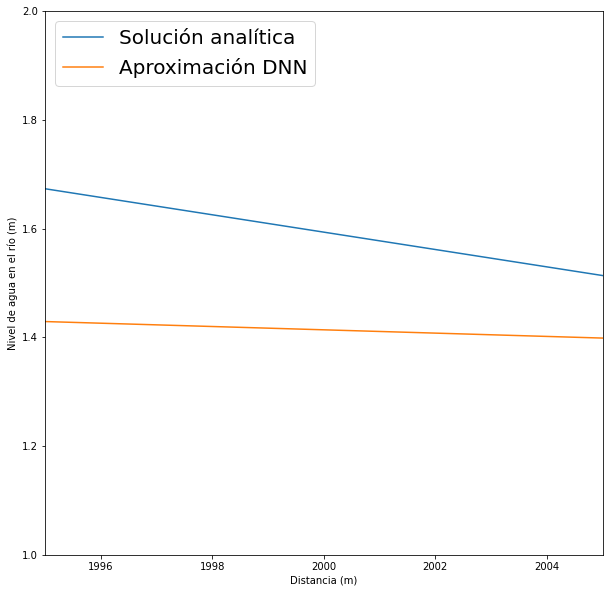

<Figure size 432x288 with 0 Axes>

In [187]:
figure(figsize=(10,10))
X = np.linspace(0, 2005, 100)
#X = np.arange(1999.5, 2000.5, 0.1)
result = []
for i in X:
	# result.append(f(i))
	result.append(g(i).numpy()[0][0][0])
plt.plot(X, solucion_analitica(X), label="Solución analítica")
plt.plot(X, result, label="Aproximación DNN")
plt.legend(loc=2, prop={'size': 20})
plt.xlim([1995, 2005])
plt.ylim([1, 2])
plt.xlabel("Distancia (m)")
plt.ylabel("Nivel de agua en el río (m)")
plt.show()
plt.savefig("Dupuit.png")


In [181]:
g(x1)


<tf.Tensor: shape=(1, 1, 1), dtype=float32, numpy=array([[[4.463031]]], dtype=float32)>

In [182]:
g(2000)

<tf.Tensor: shape=(1, 1, 1), dtype=float32, numpy=array([[[1.4138889]]], dtype=float32)>

In [183]:
solucion_analitica(2000)

1.6000000000000008

-
-
-

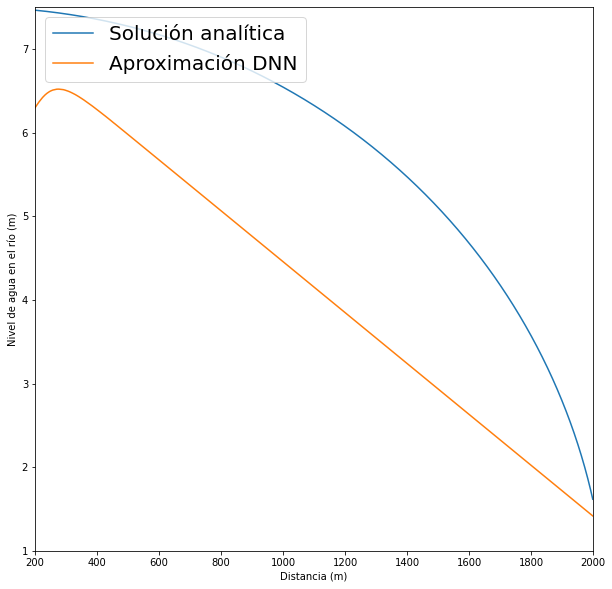

<Figure size 432x288 with 0 Axes>

In [188]:
figure(figsize=(10,10))
#X = np.linspace(x1, x2, 100)
X = np.arange(200, 2000, 1)
result = []
for i in X:
	# result.append(f(i))
	result.append(g(i).numpy()[0][0][0])
plt.plot(X, solucion_analitica(X), label="Solución analítica")
plt.plot(X, result, label="Aproximación DNN")
plt.legend(loc=2, prop={'size': 20})
#plt.xlim([0, 2000])
plt.xlim([200, 2000])
plt.ylim([1, 7.5])
plt.xlabel("Distancia (m)")
plt.ylabel("Nivel de agua en el río (m)")
plt.show()
plt.savefig("Dupuit.png")